In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
%pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [11]:
import splitfolders 
splitfolders.ratio('/kaggle/input/agronify-dataset/DiseasedPlants/Perkebunan/Kopi', output='Kopi', seed=1337, ratio=(.8, .1,.1), group_prefix=None) 

import os
train_dir = os.path.join('Kopi', 'train')
test_dir = os.path.join('Kopi', 'test')
val_dir = os.path.join('Kopi', 'val')

Copying files: 1103 files [00:30, 36.04 files/s]


In [13]:
IMAGE_SIZE = 256
CHANNELS = 3

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        val_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 881 images belonging to 4 classes.
Found 108 images belonging to 4 classes.
Found 114 images belonging to 4 classes.


In [15]:
train_generator.class_indices

{'Coffee__cercospora_leaf_spot': 0,
 'Coffee__healthy': 1,
 'Coffee__red_spider_mite': 2,
 'Coffee__rust': 3}

In [16]:
class_names = list(train_generator.class_indices.keys())
class_names

['Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust']

In [18]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.36079845 0.4326892  0.13074252]
  [0.35943317 0.431779   0.12846702]
  [0.35806787 0.4308688  0.12619154]
  ...
  [0.617128   0.77399075 0.87215406]
  [0.60427856 0.7611413  0.85990393]
  [0.6154935  0.7723562  0.8734454 ]]

 [[0.3619177  0.42971778 0.14561948]
  [0.36237282 0.43062794 0.1442542 ]
  [0.3628279  0.43153813 0.14288889]
  ...
  [0.61459833 0.7721305  0.8718295 ]
  [0.61568093 0.77438134 0.87510645]
  [0.6052841  0.76307434 0.8612261 ]]

 [[0.37557077 0.44223744 0.16380605]
  [0.37329528 0.43996197 0.16153057]
  [0.37101978 0.43768644 0.15925507]
  ...
  [0.6120365  0.770727   0.87082374]
  [0.6118043  0.7748699  0.87346154]
  [0.61275685 0.77675205 0.8741585 ]]

 ...

 [[0.14117648 0.20392159 0.0509804 ]
  [0.14117648 0.20392159 0.0509804 ]
  [0.14117648 0.20392159 0.0509804 ]
  ...
  [0.17519495 0.25362632 0.        ]
  [0.1764706  0.24858865 0.        ]
  [0.22179647 0.26345575 0.        ]]

 [[0.14117648 0.20392159 0.0509804 ]
  [0.14117648 0.20392159 0.0509804 ]


In [19]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5106462  0.6188484  0.29061016]
  [0.54485005 0.65146714 0.5129722 ]
  [0.5653745  0.700424   0.6691411 ]
  ...
  [0.21333164 0.28145513 0.13893406]
  [0.1990989  0.26925564 0.12622626]
  [0.18486616 0.25705615 0.11351845]]

 [[0.50708807 0.6173235  0.26519457]
  [0.53976697 0.6453674  0.4814568 ]
  [0.5643578  0.693816   0.6564334 ]
  ...
  [0.14773406 0.22223088 0.07844435]
  [0.15027562 0.22324751 0.07996929]
  [0.15281719 0.22426413 0.08149423]]

 [[0.5035299  0.6157986  0.23977898]
  [0.5346838  0.6392677  0.44994146]
  [0.56334126 0.68720794 0.6437256 ]
  ...
  [0.16717649 0.23000786 0.09266668]
  [0.16971804 0.23102449 0.09520824]
  [0.17225961 0.2320411  0.0977498 ]]

 ...

 [[0.33620724 0.38163957 0.25022218]
  [0.34078208 0.38570607 0.25733852]
  [0.34535685 0.38977256 0.2644549 ]
  ...
  [0.25609413 0.36862746 0.09028236]
  [0.2509804  0.37384757 0.10716792]
  [0.23809555 0.36358577 0.10599459]]

 [[0.34411535 0.39043945 0.2727924 ]
  [0.34004885 0.3873896  0.26974252]


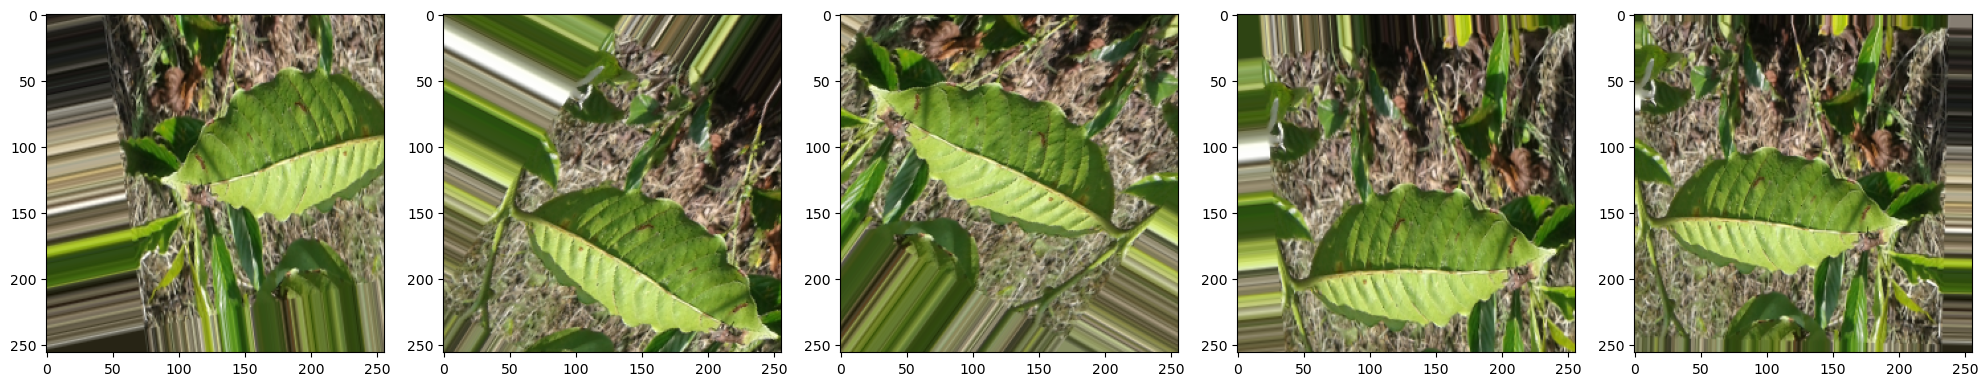

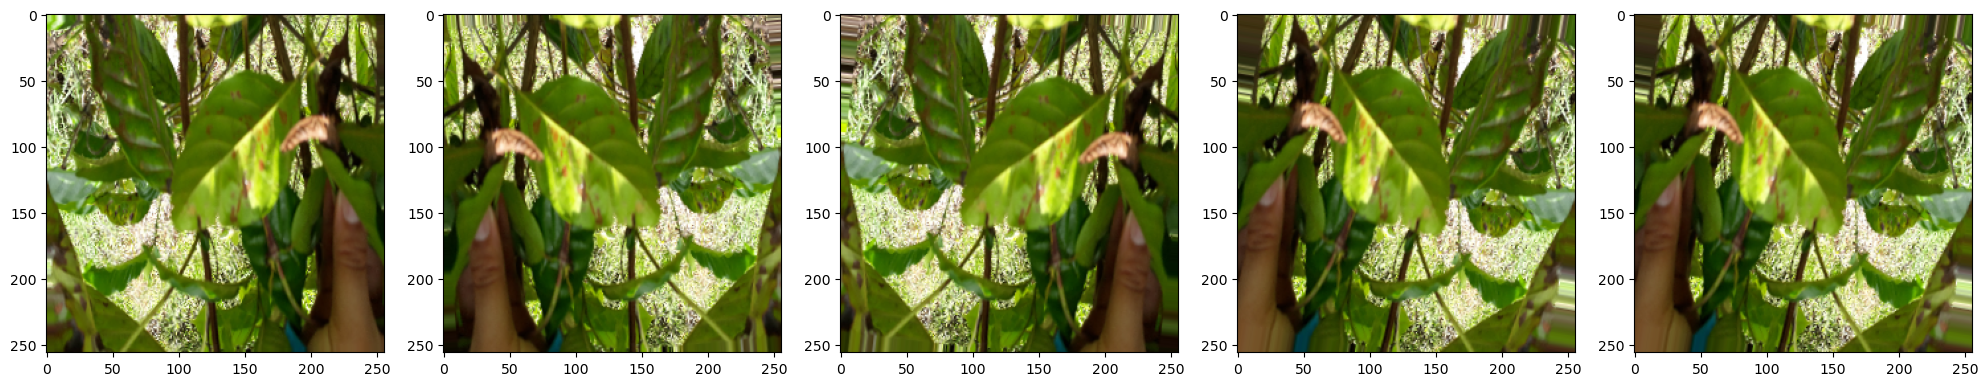

In [20]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
# Plot a few training images
img_array = [train_generator[0][0][0] for i in range(5)]
plotImages(img_array)

# plot a few val images
img_array  = [validation_generator[0][0][0] for i in range(5)]
plotImages(img_array)

**Model**

In [31]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
  
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)      

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch=27,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=3,
    verbose=1
)

Epoch 1/100
27/27 [==============================] - 55s 2s/step - loss: 0.9897 - accuracy: 0.5194 - val_loss: 0.8991 - val_accuracy: 0.6354
Epoch 2/100
27/27 [==============================] - 54s 2s/step - loss: 0.9827 - accuracy: 0.5383 - val_loss: 0.9136 - val_accuracy: 0.5729
Epoch 3/100
27/27 [==============================] - 54s 2s/step - loss: 1.0115 - accuracy: 0.5265 - val_loss: 0.9619 - val_accuracy: 0.5521
Epoch 4/100
27/27 [==============================] - 55s 2s/step - loss: 0.9444 - accuracy: 0.5677 - val_loss: 0.8884 - val_accuracy: 0.6146
Epoch 5/100
27/27 [==============================] - 54s 2s/step - loss: 0.9540 - accuracy: 0.5618 - val_loss: 0.9129 - val_accuracy: 0.5833
Epoch 6/100
27/27 [==============================] - 54s 2s/step - loss: 0.9179 - accuracy: 0.5901 - val_loss: 0.8331 - val_accuracy: 0.6354
Epoch 7/100
27/27 [==============================] - 54s 2s/step - loss: 0.8197 - accuracy: 0.6796 - val_loss: 0.6975 - val_accuracy: 0.7292
Epoch 8/100
2

In [36]:
scores = model.evaluate(test_generator)

4/4 [==============================] - 5s 1s/step - loss: 0.7686 - accuracy: 0.7807


In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

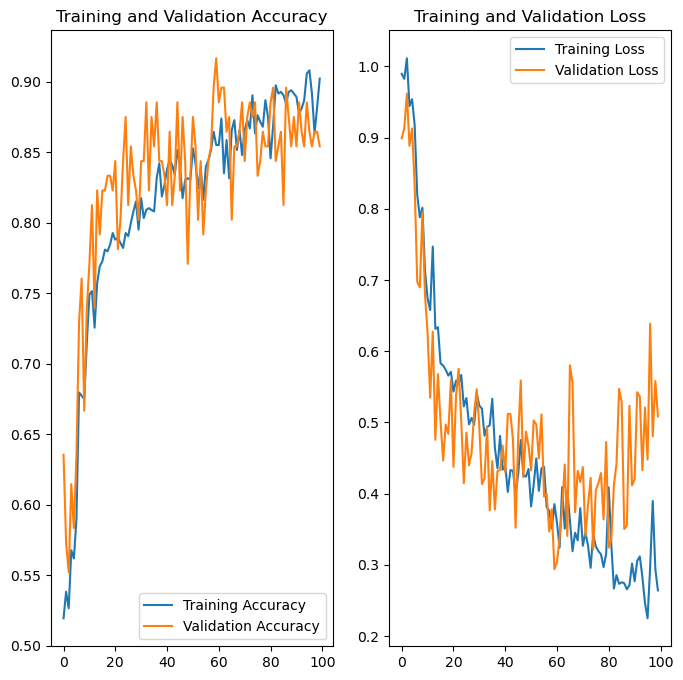

In [38]:
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Coffee__healthy
1/1 [==============================] - 1s 736ms/step
predicted label: Coffee__healthy


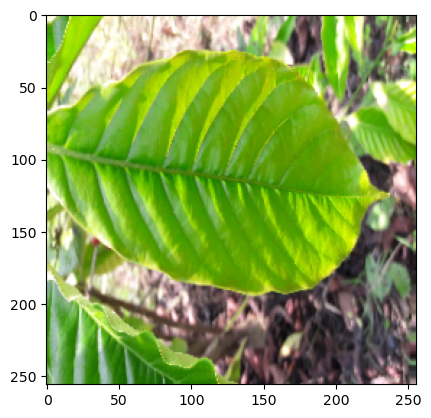

In [39]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


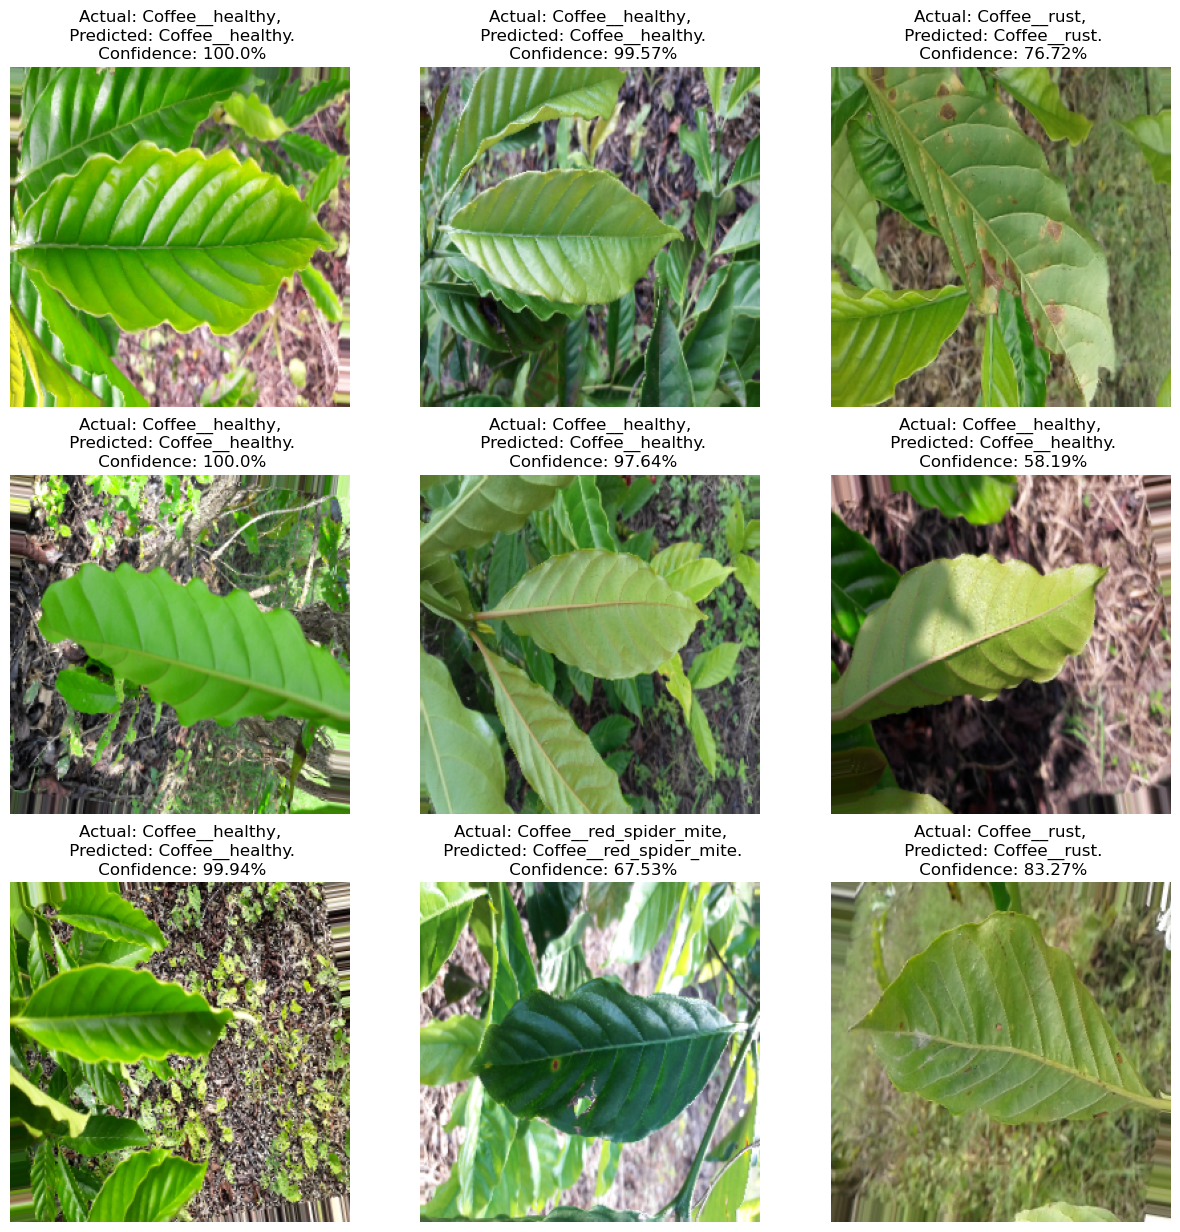

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [42]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(confusion_matrix(true_classes, predicted_classes))

4/4 [==============================] - 5s 1s/step
                              precision    recall  f1-score   support

Coffee__cercospora_leaf_spot       0.00      0.00      0.00         6
             Coffee__healthy       0.44      0.47      0.45        45
     Coffee__red_spider_mite       0.10      0.11      0.10        18
                Coffee__rust       0.36      0.31      0.33        45

                    accuracy                           0.32       114
                   macro avg       0.22      0.22      0.22       114
                weighted avg       0.33      0.32      0.33       114

[[ 0  2  2  2]
 [ 1 21  5 18]
 [ 3  8  2  5]
 [ 2 17 12 14]]


In [43]:
model.save('model.h5')